In this notebook, I will study how to figure out the relation between the distance d (horizontal distance from the center) and the relative projection (perpendicular to the image)

In [66]:
from plotly.offline import plot, init_notebook_mode, iplot
init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np

from IPython.display import Image
from IPython.core.display import HTML

import matplotlib.pyplot as plt
%matplotlib inline

# Homogenous Cylinder (radius r1) 

## Create Correction Algorithm 

In [25]:
Image(url="images/homogenous_cylinder.png", width=300, height=300, unconfined=True)

In [201]:
r1 = 300
d = np.arange(-r1, r1, 0.01)
rp = 2*r1*np.sin(np.arccos(d/r1))

trace = go.Scatter(x=d,
                  y=rp,
                  name='rp')
coeff_correction = 2*r1-rp
trace_2 = go.Scatter(x=d,
                    y=coeff_correction,
                    name='Intensity correction')
layout = go.Layout(title="r_projected vs d",
                  xaxis=dict(title="d"),
                  yaxis=dict(title="r_projected"))

figure = go.Figure(data=[trace, trace_2], layout=layout)
iplot(figure)

## Testing Correction Algorithm 

### Create Fake Cylindrical Data Set

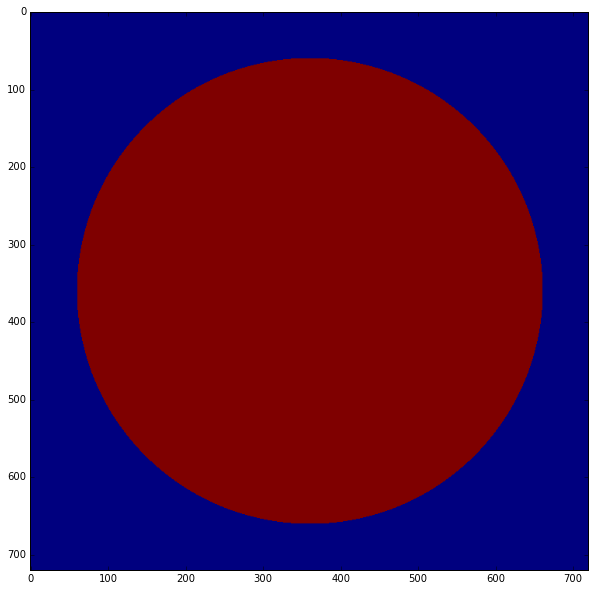

In [210]:
intensity = 2
r=r1
width=height=2*r

def is_point_inside_circle(x,y):
    _r = x*x + y*y
    if np.sqrt(_r) < r:
        return True
    return False

border = np.int(r/5)
x_range = np.arange(-r-border,r+border)
y_range = np.arange(-r-border,r+border)

circle_matrix_bool = np.empty([len(y_range), len(x_range)], dtype=np.bool)
for x in x_range:
    for y in y_range:
        _result = is_point_inside_circle(x, y)
        circle_matrix_bool[x+r+border, y+r+border] = _result
        
circle_matrix = np.zeros([len(y_range), len(x_range)])
circle_matrix[circle_matrix_bool] = intensity

fig =  plt.figure(figsize=(10,10))
ax_img = plt.subplot(111)
ax_img.imshow(circle_matrix)

### Get Projected Image Over x-axis 

In [211]:
projected_image = np.sum(circle_matrix, axis=0)

trace = go.Scatter(y=projected_image)
layout = go.Layout(title="Projected Image",
                  xaxis=dict(title="Counts"),
                  yaxis=dict(title="x"))

figure = go.Figure(data=[trace], layout=layout)
iplot(figure)

In [212]:
# find center, radius and truncate array

center = np.int(len(x_range)/2)
radius = r

projected_image_only = projected_image[center - radius:center + radius + 1]

trace = go.Scatter(y=projected_image_only)
layout = go.Layout(
    title="Projected Image Only",
    xaxis=dict(title="Counts"),
    yaxis=dict(title="x"))

figure = go.Figure(data=[trace], layout=layout)
iplot(figure)

### Apply Correction to Recover Homogenous Profile

In [223]:
d = np.arange(-r, r)
rp = 2*r*np.sin(np.arccos(d/r))
intensity = projected_image_only[np.int(len(projected_image_only)/2)]/(2*r)

coeff_correction = (2*r-rp) * intensity  

expected_array = []
for _index, x in enumerate(d):
    measure = projected_image_only[_index]
    projected = coeff_correction[_index]
    expected_array.append((measure + projected)/2)

trace = go.Scatter(y=expected_array)
layout = go.Layout(title="Expected Array",
                  xaxis=dict(title=""),
                  yaxis=dict(title="",
                            range=[0,610]))

figure = go.Figure(data=[trace], layout=layout)
iplot(figure)

# Inhomogenous Cylinder (radius r1 inside Cylinder of radius r2)

In [28]:
Image(url="images/inhomogenous_cylinder.png", width=450, height=450, unconfined=True)

In [39]:
r1 = 5
r2 = 9
d = np.arange(-r2, r2, 0.01)

rp_array=[]
for _d in d:
    if np.abs(_d)>=r2:
        rp_array.append(0)
    elif (np.abs(_d)>=r1) and (np.abs(_d)<=r2):
        rp2 = 2*r2*np.sin(np.arccos(_d/r2))
        rp_array.append(rp2)
    else:
        rp1 = 2*r1*np.sin(np.arccos(_d/r1))
        rp2 = 2*r2*np.sin(np.arccos(_d/r2))
        rp = rp2 - rp1      
        rp_array.append(rp)


In [41]:
trace = go.Scatter(x=d,
                  y=rp_array)
layout = go.Layout(title="r_projected vs d",
                  xaxis=dict(title="d"),
                  yaxis=dict(title="r_projected"))

figure = go.Figure(data=[trace], layout=layout)
iplot(figure)